<a href="https://colab.research.google.com/github/data-analytics-workshop/python/blob/master/003_machine_learning_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning with Scikit-Learn

Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to perform a specific task without using explicit instructions, relying on patterns and inference instead. It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task. Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop a conventional algorithm for effectively performing the task.


Scikit-learn is a free machine learning library for Python. It features various algorithms like support vector machine, random forests, and k-neighbours, and it also supports Python numerical and scientific libraries.

Import Libraries

In [0]:
# Import Library for Data Manipulation
import pandas as pd
import numpy as np

In [0]:
# Import Library for Visualization
import matplotlib. pyplot as plt
import seaborn as sns

## **Supervised Learning**

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. This requires the learning algorithm to generalize from the training data to unseen situations in a "reasonable" way.

### **1. Regression Model**

Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features').

#### ***a. Linear Regression***

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

**Import Data**

In [0]:
# Import Dataset
df_salary = pd.read_csv('https://raw.githubusercontent.com/andrybrew/all-files/master/dataset_python/salary_data.csv')
df_salary

In [0]:
# Prints the Dataset Information
df_salary.info()

In [0]:
# Prints Descriptive Statistics
df_salary.describe().transpose()

**Modeling Linear Regression**

In [0]:
# Importing Linear Regression Module
from sklearn.linear_model import LinearRegression

# Modeling Linear Regression
lr = LinearRegression()

# Select X and Y Variable
X = df_salary.iloc[:, :-1].values
Y = df_salary.iloc[:, 1].values

# Apply Model to Data
lr.fit(X, Y)

# Show Coefficent and Intercept
print('Coefficient = ', lr.coef_)
print('Intercept =', lr.intercept_)

**Visualizing Result**

In [0]:
# Draw Scatter Plot with X and Y Axes
plt.scatter(X, Y)

# Show Regression Line with Green Color
plt.plot(X, lr.predict(X), color = 'green')

# Set Title and Axes Name
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Show Plot
plt.show()

#### ***b. Logistic Regression Model***

logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.

**Import Data**

In [0]:
# Import Dataset
df_churn = pd.read_csv('https://raw.githubusercontent.com/dianrdn/data/master/customer_churn.csv', sep = ';')
df_churn

In [0]:
# Prints the Dataset Information
df_churn.info()

In [0]:
# Prints Descriptive Statistics
df_churn.describe().transpose()

**Data Preparation**

Handling Missing Values

In [0]:
# Check for Missing Values
df_churn.isnull().sum()

In [0]:
# Search for Median Value
median = df_churn['TotalCharges'].median()

# Use Median to Replace Missing Values
df_churn['TotalCharges'].fillna(median, inplace=True)

# Check for Missing Values
df_churn.isnull().sum()

Encode Categorical Data

In [0]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_churn[['gender', 'InternetService', 'Contract', 'PaymentMethod']]))
df_encoded.columns = encoder.get_feature_names(['gender', 'InternetService', 'Contract', 'PaymentMethod'])

# Replace Categotical Data with Encoded Data
df_churn.drop(['gender', 'InternetService', 'Contract', 'PaymentMethod'] ,axis=1, inplace=True)
df_churn_encoded= pd.concat([df_churn, df_encoded], axis=1)

# Show Encoded Dataframe
df_churn_encoded

Set Feature and Target

In [0]:
# Select Features
feature = df_churn_encoded.drop(['customerID', 'Churn'], axis=1)
feature

In [0]:
# Select Target
target = df_churn_encoded['Churn']
target

Set Training and Testing Data

In [0]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
feature_train, feature_test, target_train, target_test = train_test_split(feature , target, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)

**Modeling Logistic Regression**

In [0]:
# Import library
from sklearn.linear_model import LogisticRegression

# Modeling Logistic Regression
logreg = LogisticRegression()
logreg_model = logreg.fit(feature_train, target_train)

# Predict Test Data 
target_predicted_logreg = logreg.predict(feature_test)
target_predicted_logreg

**Model Evaluation**

In [0]:
# Import Library
import sklearn.metrics as metrics

# Confsion Matrix
cm_logreg = metrics.confusion_matrix(target_test, target_predicted_logreg)
cm_logreg

In [0]:
# Accuracy, Precision, Recall
acc_logreg = metrics.accuracy_score(target_test, target_predicted_logreg)
prec_logreg = metrics.precision_score(target_test, target_predicted_logreg)
rec_logreg = metrics.recall_score(target_test, target_predicted_logreg)
f1_logreg = metrics.f1_score(target_test, target_predicted_logreg)
kappa_logreg = metrics.cohen_kappa_score(target_test, target_predicted_logreg)

# Show Accuracy, Precision, Recall
print('Accuracy:', acc_logreg)
print('Precision:', prec_logreg)
print('Recall:', rec_logreg)
print('F1 Score:', f1_logreg)
print('Cohens Kappa Score:', kappa_logreg)

In [0]:
# Import Visualization Package
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
target_predicted_logreg_prob = logreg.predict_proba(feature_test)[::,1]
fp_rate_logreg, tp_rate_logreg, _ = metrics.roc_curve(target_test,  target_predicted_logreg_prob)
auc_logreg = metrics.roc_auc_score(target_test, target_predicted_logreg_prob)
plt.plot(fp_rate_logreg, tp_rate_logreg, label='Decision Tree, auc='+str(auc_logreg))
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### **2. Classification Model**

 classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known. Examples are assigning a given email to the "spam" or "non-spam" class, and assigning a diagnosis to a given patient based on observed characteristics of the patient (sex, blood pressure, presence or absence of certain symptoms, etc.). Classification is an example of pattern recognition.

We use churn dataframe that already created before, including all of the data preparation steps.

**Show Data**

In [0]:
# Show Raw Dataset
df_churn

In [0]:
# Show Encoded Dataframe
df_churn_encoded

In [66]:
# Show Features
feature

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,0,1,2985,2985.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,0,0,5695,18895.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,0,1,5385,10815.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,0,0,423,184075.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,0,1,707,15165.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,0,1,1,1,1,1,848,19905.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0,1,1,72,1,0,1,1,0,1,1,1,1032,73629.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0,1,1,11,0,1,0,0,0,0,0,1,296,34645.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,0,4,1,0,0,0,0,0,0,1,744,3066.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [0]:
# Show Targets
target

In [0]:
# Show the Training and Testing Data
print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)

##### ***a. Decision Tree Classifier***

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.

**Modeling Decision Tree Classifier**

In [0]:
# Import library
from sklearn import tree

# Modeling Decision Tree
dtree = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtree.fit(feature_train, target_train)

# Predict Test Data 
target_predicted_dtree = dtree.predict(feature_test)
target_predicted_dtree

In [0]:
# Visualize Tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['notchurn', 'churn'],
                feature_names=['SeniorCitizen',	'Partner',	'Dependents', 'tenure',	'PhoneService', 'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',
                               'TechSupport',	'StreamingTV',	'StreamingMovies',	'PaperlessBilling',	'MonthlyCharges', 'TotalCharges', 'gender_Female',
                               'gender_Male',	'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',	'Contract_Month-to-month',
                               'Contract_One year',	'Contract_Two year',	'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
                               'PaymentMethod_Electronic check',	'PaymentMethod_Mailed check'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure (gini = 0) when all of its records belong to the same class, such nodes known as the leaf node.

Samples is the sum of data train which actually belongs to the decision. The first node samples is equal to the whole data train number = 4930.

Value is the sum of data train which is predicted belong to each of next node. For the first node, the values are [3589, 1341]. This means that 3589 data are predicted as notchurn, while 1341 data are predicted as churn.

Class is stated the class categori. The class of the first node is 'notchurn'. So, the next step is, if the a data have a class of notchurn = true, we move to the left node, and vice versa.

**Model Evaluation**

In [0]:
# Confsion Matrix
cm_dtree = metrics.confusion_matrix(target_test, target_predicted_dtree)
cm_dtree

In [0]:
# Accuracy, Precision, Recall
acc_dtree = metrics.accuracy_score(target_test, target_predicted_dtree)
prec_dtree = metrics.precision_score(target_test, target_predicted_dtree)
rec_dtree = metrics.recall_score(target_test, target_predicted_dtree)
f1_dtree = metrics.f1_score(target_test, target_predicted_dtree)
kappa_dtree = metrics.cohen_kappa_score(target_test, target_predicted_dtree)

# Show Accuracy, Precision, Recall
print('Accuracy:', acc_dtree )
print('Precision:', prec_dtree)
print('Recall:', rec_dtree)
print('F1 Score:', f1_dtree)
print('Cohens Kappa Score:', kappa_dtree)

In [0]:
# Import Visualization Package
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
target_predicted_dtree_prob = dtree.predict_proba(feature_test)[::,1]
fp_rate_dtree, tp_rate_dtree, _ = metrics.roc_curve(target_test,  target_predicted_dtree_prob)
auc_dtree = metrics.roc_auc_score(target_test, target_predicted_dtree_prob)
plt.plot(fp_rate_dtree, tp_rate_dtree, label="Decision Tree, auc="+str(auc_dtree))
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

##### ***b. K-Nearest Neighbor***

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

**Modeling K-Nearest Neighbor Classifier**

In [0]:
# Import Module
from sklearn.neighbors import KNeighborsClassifier

# Modeling Naive Bayes
knn = KNeighborsClassifier(n_neighbors= 71)
knn.fit(feature_train, target_train)

# Predict Test Data 
target_predicted_knn = knn.predict(feature_test)
target_predicted_knn

**Model Evaluation**

In [0]:
# Confsion Matrix
cm_knn = metrics.confusion_matrix(target_test, target_predicted_knn)
cm_knn

In [0]:
# Accuracy, Precision, Recall
acc_knn = metrics.accuracy_score(target_test, target_predicted_knn)
prec_knn = metrics.precision_score(target_test, target_predicted_knn)
rec_knn = metrics.recall_score(target_test, target_predicted_knn)
f1_knn = metrics.f1_score(target_test, target_predicted_knn)
kappa_knn = metrics.cohen_kappa_score(target_test, target_predicted_knn)

# Show Accuracy, Precision, Recall
print('Accuracy:', acc_knn)
print('Precision:', prec_knn)
print('Recall:', rec_knn)
print('F1 Score:', f1_knn)
print('Cohens Kappa Score:', kappa_knn)

In [0]:
# Import Visualization Package
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
target_predicted_knn_prob = knn.predict_proba(feature_test)[::,1]
fp_rate_knn, tp_rate_knn, _ = metrics.roc_curve(target_test,  target_predicted_knn_prob)
auc_knn = metrics.roc_auc_score(target_test, target_predicted_knn_prob)
plt.plot(fp_rate_knn, tp_rate_knn, label="Decision Tree, auc="+str(auc_knn))
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

##### ***c. Naive Bayes Classifier***

Naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. 

**Modeling Naive Bayes Classifier**

In [0]:
# Import Module
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes
nb = GaussianNB()
nb.fit(feature_train, target_train)

# Predict Test Data 
target_predicted_nb = nb.predict(feature_test)
target_predicted_nb

**Model Evaluation**

In [0]:
# Confsion Matrix
cm_nb = metrics.confusion_matrix(target_test, target_predicted_nb)
cm_nb

In [0]:
# Accuracy, Precision, Recall
acc_nb = metrics.accuracy_score(target_test, target_predicted_nb)
prec_nb = metrics.precision_score(target_test, target_predicted_nb)
rec_nb = metrics.recall_score(target_test, target_predicted_nb)
f1_nb = metrics.f1_score(target_test, target_predicted_nb)
kappa_nb = metrics.cohen_kappa_score(target_test, target_predicted_nb)

# Show Accuracy, Precision, Recall
print('Accuracy:', acc_nb)
print('Precision:', prec_nb)
print('Recall:', rec_nb)
print('F1 Score:', f1_nb)
print('Cohens Kappa Score:', kappa_nb)

In [0]:
# Import Visualization Package
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
target_predicted_nb_prob = nb.predict_proba(feature_test)[::,1]
fp_rate_nb, tp_rate_nb, _ = metrics.roc_curve(target_test,  target_predicted_nb_prob)
auc_nb = metrics.roc_auc_score(target_test, target_predicted_nb_prob)
plt.plot(fp_rate_nb, tp_rate_nb, label="Decision Tree, auc="+str(auc_nb))
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### d.Compare Evaluation Result

In [0]:
# Comparing Model Performance
print('Decision Tree Accuracy =',acc_dtree)
print('Decision Tree Precision =',prec_dtree)
print('Decision Tree Recall =',rec_dtree)
print('Decision Tree F1-Score =', f1_dtree)
print('_______________________')
print('k-NN Accuracy =', acc_knn)
print('k-NN Precision =', prec_knn)
print('k-NN Recall =', rec_knn)
print('k-NN F1-Score =', f1_knn)
print('_______________________')
print('Naive Bayes Accuracy =', acc_nb)
print('Naive Bayes Precision =', prec_nb)
print('Naive Bayes Recall =', rec_nb)
print('Naive Bayes F1-Score =', f1_nb)

In [0]:
# Comparing ROC Curve
plt.plot(fp_rate_dtree,tp_rate_dtree,label='Decision Tree, auc='+str(auc_dtree))
plt.plot(fp_rate_knn,tp_rate_knn,label='K-NN, auc='+str(auc_knn))
plt.plot(fp_rate_nb,tp_rate_nb,label='Naive Bayes, auc='+str(auc_nb))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## **Unsupervised Learning**

Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision. In contrast to supervised learning that usually makes use of human-labeled data, unsupervised learning, also known as self-organization allows for modeling of probability densities over inputs.

### **1. Clustering Model**

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

**Import Data**

In [0]:
# Import Dataset
df_income = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/bigdatacertification/master/dataset/clustering.csv')
df_income

In [0]:
# Prints the Dataset Information
df_income.info()

In [0]:
# Prints Descriptive Statistics
df_income.describe().transpose()

**Data Preparation**

First, we standardize the data to equalize the range and/or data variability. Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. 

In [101]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_income.columns.tolist()
df_income[column_names] = scaler.fit_transform(df_income[column_names])
df_income.sort_index(inplace=True)
df_income.head()

,INCOME,SPEND
0,-0.253492,0.015443
1,0.097607,1.633471
2,-0.852427,0.977514
3,-0.191534,1.239897
4,2.245510,0.583939


Text(0, 0.5, 'Annual Spend')

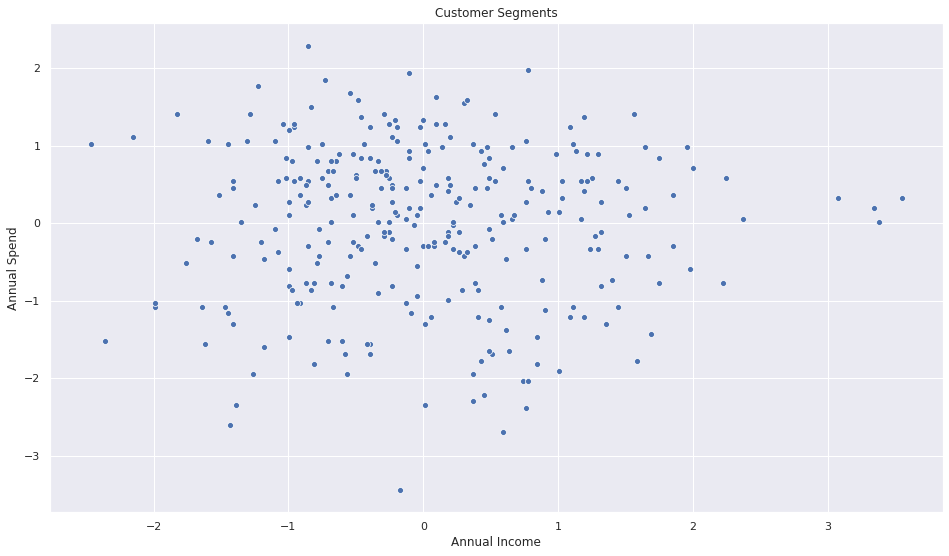

In [102]:
# Styling Plot
sns.set() 
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
sns.scatterplot(x='INCOME', y='SPEND', data=df_income)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')

**Modeling**

##### **a .K-Means Clustering**

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

**Search for the Optimum Number of Clusters (k)**

In [0]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [0]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

Modeling K-Means Clustering

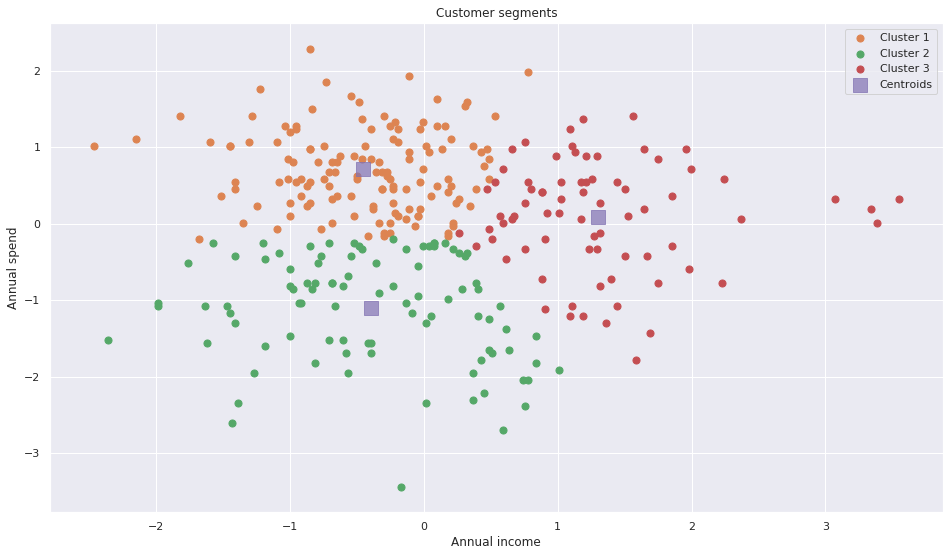

In [100]:
# Apply the K-Means Model to the Data
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(X)

# Visualising Clusters for k=3
sns.scatterplot(x='INCOME', y='SPEND', data=df_income)
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(km2.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

##### b.Hierarchical Clustering

Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

Modeling Hierarchical Clustering

In [0]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel('Customer')
plt.ylabel('euclidean')
plt.show()

In [0]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Visualising Clusters for k=3
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

### 4.Association Rule Mode

Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness.

#### a.Market Basket Analysis

Market Basket Analysis is a modelling technique based upon the theory that if you buy a certain group of items, you are more (or less) likely to buy another group of items. For example, if you are in an English pub and you buy a pint of beer and don't buy a bar meal, you are more likely to buy crisps at the same time than somebody who didn't buy beer.

The set of items a customer buys is referred to as an itemset, and market basket analysis seeks to find relationships between purchases.

Import Dataset

In [0]:
# Import dataset
df_retail = pd.read_excel("https://github.com/rc-dbe/bigdatacertification/blob/master/dataset/Online%20Retail.xlsx?raw=true")
df_retail

In [0]:
# Prints the Dataset Information
df_retail.info()

In [0]:
# Prints Descriptive Statistics
df_retail.describe().transpose()

Data Preparation

In [0]:
# Remove Additional Spaces
df_retail['Description'] = df_retail['Description'].str.strip()

# Remove Missing Values
df_retail.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

# Remove Cancelled Orders
df_retail['InvoiceNo'] = df_retail['InvoiceNo'].astype('str')
df_retail = df_retail[~df_retail['InvoiceNo'].str.contains('C')]

In [0]:
# Create Encode Function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

def create_basket(country_filter):
    basket = (df_retail[df_retail['Country'] == country_filter]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
    return basket

In [0]:
# Select Retail Data by Country : France
country_filter = 'France'
basket_french = create_basket('France')
basket_sets = basket_french.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

Modeling

In [0]:
# Import Apriori Module
from mlxtend.frequent_patterns import apriori

# Search for Frequent Itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
frequent_itemsets.head()

In [0]:
# Import Association Rules Module
from mlxtend.frequent_patterns import association_rules

# Generate Rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
rules.head()

In [0]:
# Sorting the Rules by Confidence
rules.sort_values(['confidence'], axis=0, 
                 ascending=False, inplace=True) 
rules

### 5.Dimensionality Reduction

Dimensionality reduction or dimension reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. 

#### a.Principal Component Analysis

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

Import Data

In [0]:
# Here We Are Using Inbuilt Dataset of Scikit-Learn 
from sklearn.datasets import load_breast_cancer 
  
# Instantiating 
cancer = load_breast_cancer() 

# Creating Dataframe 
df_pca = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 
df_pca

Data Preparation

In [0]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
scaler.fit(df_pca) 

# Transformed Data
df_pca_scaled = pd.DataFrame(scaler.transform(df_pca))

# Checking Data
df_pca_scaled

In [0]:
# Fit Standardization
scaler.fit(df_pca) 

# Transformed Data
df_pca_scaled = pd.DataFrame(scaler.transform(df_pca))

# Checking Head of Data
df_pca_scaled.head(5) 

Principal Component Analysis (2 Principal Components)

In [0]:
# Importing PCA Module
from sklearn.decomposition import PCA 

# Modeling PCA with Components = 2 
pca2 = PCA(n_components = 2) 

# Apply Model to Data
pca2.fit(df_pca_scaled) 

# Show Result
x_pca2 = pca2.transform(df_pca_scaled) 
df_pca2_result = pd.DataFrame(x_pca2)
df_pca2_result

Visualizing Result

In [0]:
# Plot 
plt.scatter(x_pca2[:, 0], x_pca2[:, 1], c = cancer['target'], cmap ='plasma') 

# Labeling X and Y Axes 
plt.title('Principal Component Analysis')
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component')

In [0]:
# Plotting Heatmap
df_comp2 = pd.DataFrame(pca2.components_, columns = cancer['feature_names']) 
sns.heatmap(df_comp2)

Principal Component Analysis (3 Principal Components)

In [0]:
# Importing PCA Module
from sklearn.decomposition import PCA 

# Modeling PCA with Components = 3
pca3 = PCA(n_components = 3) 

# Apply Model to Data
pca3.fit(df_pca_scaled) 

# Show Result
x_pca3 = pca3.transform(df_pca_scaled) 
df_pca3_result = pd.DataFrame(x_pca3)
df_pca3_result

Visualizing Result

In [0]:
# Import Axes3D Module
from mpl_toolkits.mplot3d import Axes3D

# Plot 
ax = plt.axes(projection='3d')
ax.scatter(x_pca3[:, 0], x_pca3[:, 1], x_pca3[:, 2], c = cancer['target'], cmap ='plasma') 

# Labeling X and Y Axes 
plt.title('Principal Component Analysis')
ax.set_xlabel('First Principal Component') 
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')